In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns; sns.set_theme(color_codes=True)

# 1. Plots and regression planes
Given a dataset of vehicles we are trying to visualize and establish relationships between horsepower, prices and fuel efficiencies and assess if linear regression is a suitable analysis method.

In [2]:
df = pd.read_csv("imports-85.csv").dropna()
log_price = np.log(df["price"] - df["price"].min() + 1)
sq_price = df["price"] ** 2
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


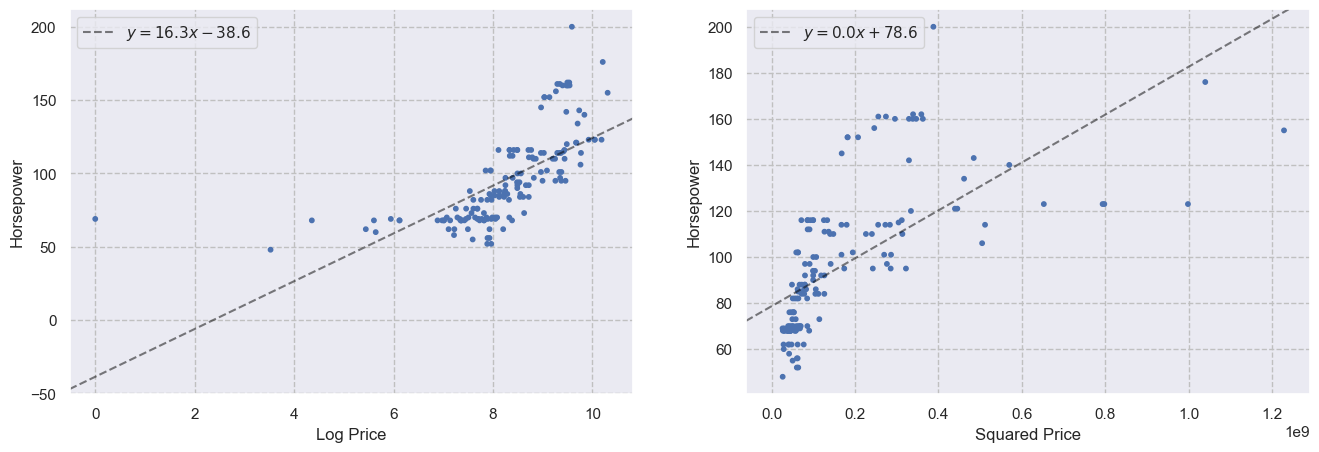

In [3]:
plt.figure(figsize=(16,5))
plt.title("Plotting horsepower against price")
plt.subplot(1,2,1)
plt.grid(linestyle="--", color="silver")
plt.xlabel("Log Price")
plt.ylabel("Horsepower")
reg1 = sm.OLS(df["horsepower"], sm.add_constant(log_price)).fit(cov="HC0")
b, m = reg1.params
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$', alpha=0.5, color="black", linestyle="--")
plt.scatter(log_price, df["horsepower"], s=[10 for i in range(len(df))])
plt.legend()

plt.subplot(1,2,2)
plt.grid(linestyle="--", color="silver")
plt.xlabel("Squared Price")
plt.ylabel("Horsepower")
reg2 = sm.OLS(df["horsepower"], sm.add_constant(sq_price)).fit(cov="HC0")
b, m = reg2.params
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$', alpha=0.5, color="black", linestyle="--")
plt.scatter(sq_price, df["horsepower"], s=[10 for i in range(len(df))])
plt.legend()

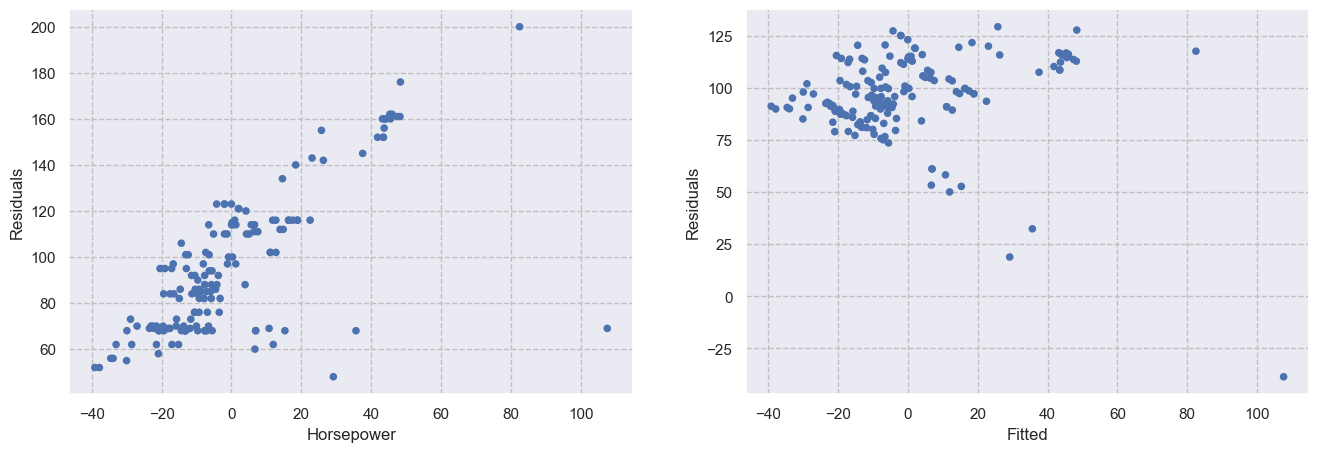

In [4]:
plt.figure(figsize=(16,5))
plt.title("Regression diagnostics")
plt.subplot(1,2,1)
plt.grid(linestyle="--", color="silver")
plt.xlabel("Horsepower")
plt.ylabel("Residuals")
plt.scatter(reg1.resid, df["horsepower"], s=[20 for i in range(len(df))])

plt.subplot(1,2,2)
plt.grid(linestyle="--", color="silver")
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.scatter(reg1.resid, reg1.fittedvalues, s=[20 for i in range(len(df))])

There is very strong correlation between residuals and horsepower despite using robust standard errors. This is an indication of heteroskedasticty and indicates that horsepower and prices dont follow a linear relationship.

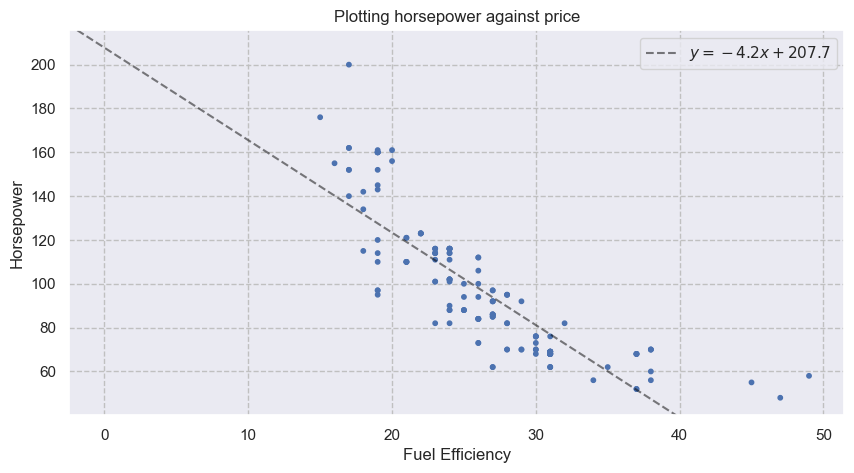

In [5]:
plt.figure(figsize=(10,5))
plt.title("Plotting horsepower against fuel efficiency")
plt.xlabel("Fuel Efficiency")
plt.ylabel("Horsepower")
plt.grid(linestyle="--", color="silver")
reg3 = sm.OLS(df["horsepower"], sm.add_constant(df["city-mpg"])).fit(cov="HC0")
b, m = reg3.params
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$', alpha=0.5, color="black", linestyle="--")
plt.scatter(df["city-mpg"], df["horsepower"], s=[10 for i in range(len(df))])
plt.legend()

A linear trend is noticable in between horsepower and fuel efficiency.

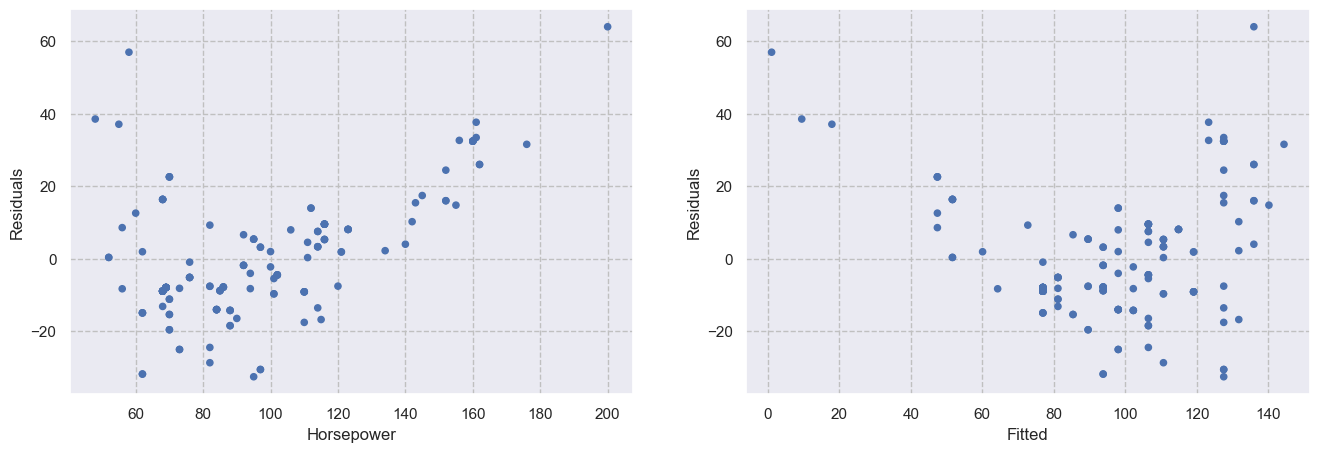

In [6]:
plt.figure(figsize=(16,5))
plt.title("Regression diagnostics")
plt.subplot(1,2,1)
plt.grid(linestyle="--", color="silver")
plt.xlabel("Horsepower")
plt.ylabel("Residuals")
plt.scatter(df["horsepower"], reg3.resid, s=[20 for i in range(len(df))])

plt.subplot(1,2,2)
plt.grid(linestyle="--", color="silver")
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.scatter(reg3.fittedvalues, reg3.resid, s=[20 for i in range(len(df))])

There is no apparent correlation between residuals and horsepower. However there is some indication of heteroskedasticity. Horsepower and fuel efficiency could be modelled using regression.

# 2. Deciles
Given a stock return data we will divide the dataset into deciles based on log(Issue). We will perform value weighted aggregation over excess returns for each year and run some heuristics around the calculations.

In [7]:
df = pd.read_csv("StockRetAcct_DT.csv", index_col=[0]).dropna()
df["ex_ret"] = df["lnAnnRet"] - df["lnRf"]
grp_yr = df.groupby("year")
grp_yr.first()

,FirmID,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind,ex_ret
year,,,,,,,,,,,,,,,,
1980,6,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0,0.284687
1981,6,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.082180,0.056381,0.356723,3.0,-0.420608
1982,6,0.186630,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0,0.055927
1983,6,0.489819,0.089830,0.000170,-0.071780,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0,0.399989
1984,50,-0.003886,0.112608,0.000072,0.340671,-0.120749,11.572387,-0.171332,-0.355613,-0.195077,0.703785,-0.286693,0.092998,0.251699,3.0,-0.116494
1985,50,-0.321691,0.073987,0.000054,0.364280,-0.387309,11.543515,-0.093638,-0.154869,0.158610,0.654933,-0.093702,0.147104,0.119771,3.0,-0.395678
1986,120,-0.030707,0.062209,0.000891,0.048186,0.190390,14.617939,0.202912,0.117003,0.082769,0.831264,0.114521,0.031988,-0.223700,8.0,-0.092917
1987,120,0.011290,0.066003,0.000709,0.034266,0.006250,14.528989,0.245821,0.095697,0.034062,0.776565,0.115265,0.035467,-0.028196,8.0,-0.054713
1988,15,0.141739,0.072406,0.000193,0.160109,0.108250,13.123762,0.239861,0.119085,0.120877,0.541653,0.134526,0.142907,-0.228204,12.0,0.069333


In [8]:
decile_returns = [0 for i in range(10)]
for name, group in grp_yr:
    
    # decile creation based on lnIssue
    group["decile"] = pd.qcut(group["lnIssue"], q=10, labels=[(i+1)*10 for i in range(10)])
    
    # assignments for fama-mcbeth regression
    group["transIssue"] = 0
    group.loc[group["decile"]==10, "transIssue"] = -1 
    group.loc[group["decile"]==90, "transIssue"] = 1
    df.loc[df["year"]==name, "transIssue"] = group["transIssue"]
    
    # in every decile portfolio each year we calculate total portfolio value weighted returns
    grp_dec = group.groupby("decile")
    i = 0
    for dec_name, dec_group in grp_dec:
        dec_group["wtd_ret"] = dec_group["MEwt"] * dec_group["ex_ret"] / dec_group["MEwt"].sum()
        decile_returns[i] += dec_group["wtd_ret"].sum()
        i = i+1
decile_returns = [x/len(grp_yr) for x in decile_returns]
print("Value weighted average Decile Returns across years 1980 to 2014 ranging from 10% percentile to 100% percentile in order: \n", decile_returns)

Value weighted average Decile Returns across years 1980 to 2014 ranging from 10% percentile to 100% percentile in order: 
 [0.06808970603371772, 0.03695811828579181, 0.033287457402197185, 0.04242154502563574, 0.0436388326435958, 0.018776011732909947, 0.013953821300047915, -0.014544577667578168, -0.005079099927845427, -0.042885353785713454]


[Text(0.5, 0, 'Portfolio Percentile'),
 Text(0, 0.5, 'Value weighted Avg returns'),
 Text(0.5, 1.0, 'Decile Returns Plot')]

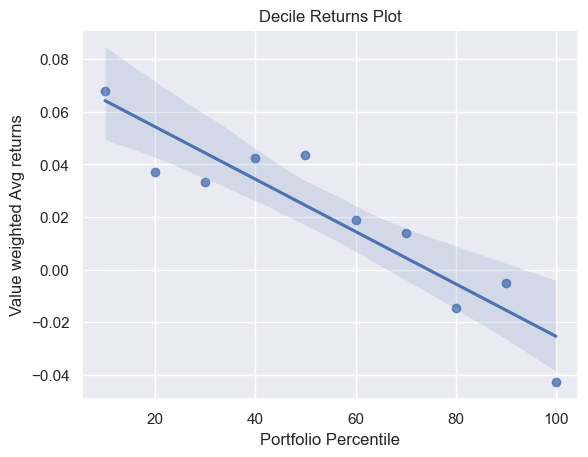

In [9]:
ax = sns.regplot(x=[(i+1)*10 for i in range(10)], y=decile_returns)
ax.set(xlabel='Portfolio Percentile', ylabel='Value weighted Avg returns', title='Decile Returns Plot')

The pattern seems fairly linear with no apparent autocorrelation or heteroskedasticity.

## Fama Mcbeth
Assuming that the most scope for returns is in the uppermost and lowermost decile, we will run fama mcbeth regression to find which stocks to long and short.

In [23]:
grp_stock = df.groupby("FirmID")
fama_mcbeth = {}
flag = True
for name, group in grp_stock:
   #fama mcbeth regression

    reg = sm.OLS(group["ex_ret"], sm.add_constant(group["transIssue"])).fit(cov="HC0")
    if (len(reg.params) == 2):
        c,beta = reg.params
        fama_mcbeth[name] = beta
    else:
        fama_mcbeth[name] = reg.params[0]

In [24]:
fm_df = pd.DataFrame()
fm_df["Stock ID"] = fama_mcbeth.keys()
fm_df["Fama McBeth Beta"] = fama_mcbeth.values()
fm_df.loc[fm_df["Fama McBeth Beta"]>0,"Position"] = "Long"
fm_df.loc[fm_df["Fama McBeth Beta"]<0,"Position"] = "Short"
fm_df.loc[fm_df["Fama McBeth Beta"]==0,"Position"] = "No Position"
fm_df

,Stock ID,Fama McBeth Beta,Position
0,6,-0.295918,Short
1,10,0.000000,No Position
2,12,0.000000,No Position
3,15,0.000379,Long
4,19,0.085891,Long
...,...,...,...
6651,20304,0.000000,No Position
6652,20305,-0.215558,Short
6653,20307,-0.161059,Short
6654,20308,0.000000,No Position


# 3. Quintiles
The dataset will be grouped based into tow types of quintiles based on book to market and company size. We will use seaborn based visualization tools to assess the relationship of returns with the quintiles.

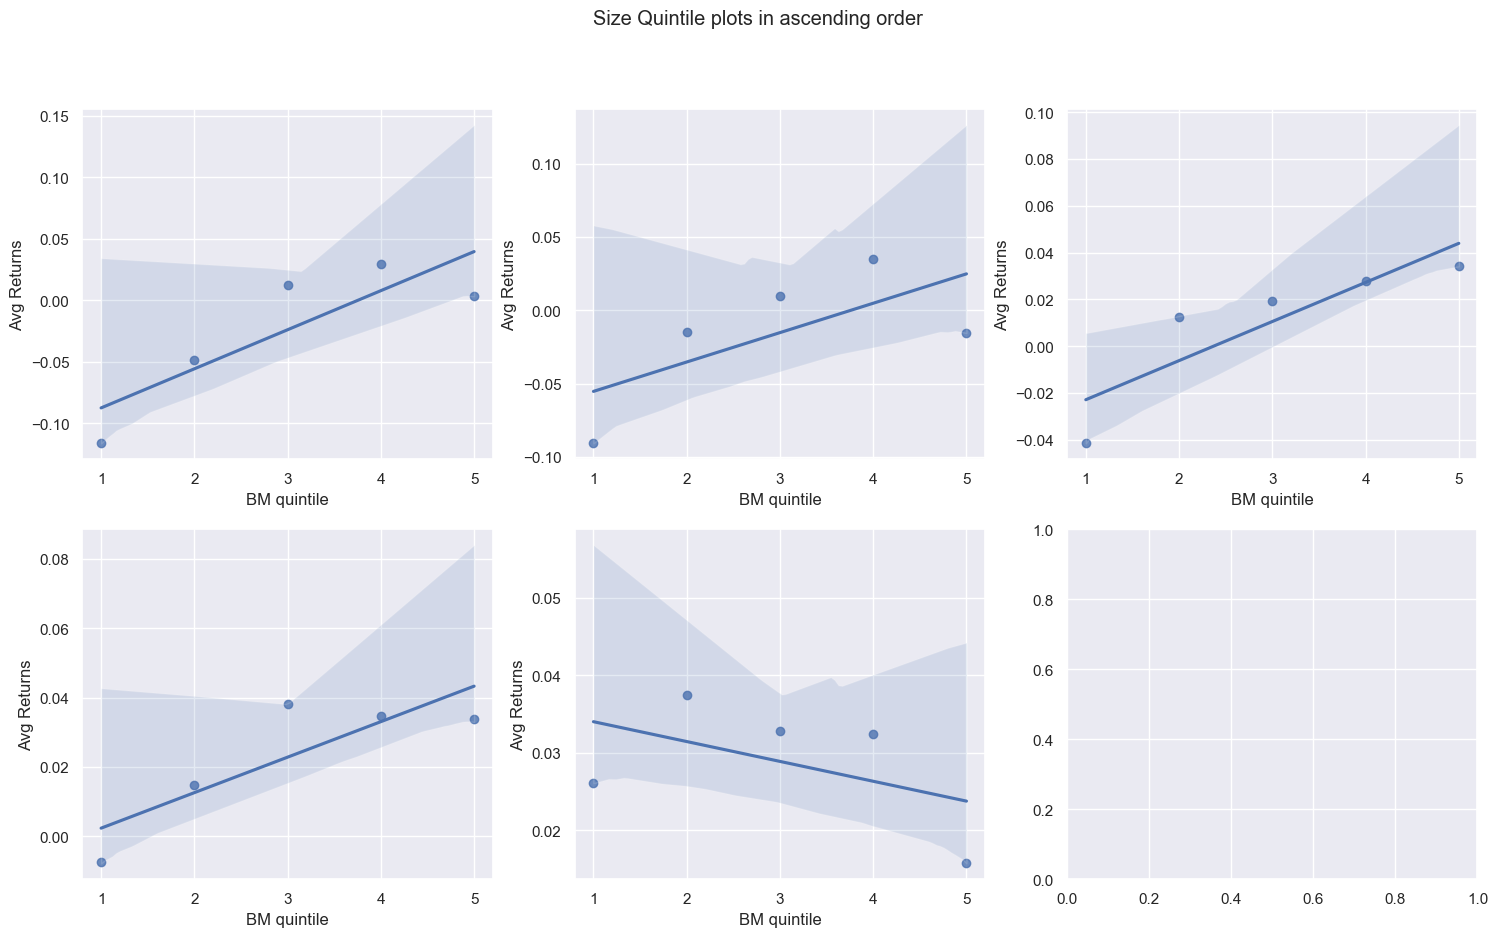

In [49]:
qt_df = pd.DataFrame().from_dict({"Size quintile": [], "BM quintile": []})

# initializing quintiles
for i in range(5):
    for j in range(5):
        qt_df.loc[len(qt_df)] = [i+1, j+1]

qt_df["Avg Returns"] = 0
for name, group in grp_yr:
    # quintile creation based on book to market
    group["quintile_BM"] = pd.qcut(group["lnBM"], q=5, labels=[(i+1) for i in range(5)])
    # quintile creation based on size
    group["quintile_size"] = pd.qcut(group["lnME"], q=5, labels=[(i+1) for i in range(5)])
    
    grp_qtsize = group.groupby("quintile_size")
    
    for name2, group2 in grp_qtsize:
        grp_qtbm = group2.groupby("quintile_BM")
        for name3, group3 in grp_qtbm:
            group3["wtd_ret"] = group3["MEwt"] * group3["ex_ret"] / group3["MEwt"].sum()
            qt_df.loc[(qt_df["Size quintile"]==name2) & (qt_df["BM quintile"]==name3), "Avg Returns"] += group3["wtd_ret"].sum()
            

qt_df["Avg Returns"] = qt_df["Avg Returns"]/len(grp_yr)
grp_obj = qt_df.groupby("Size quintile")
row, col = [0,0]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Size Quintile plots in ascending order')
for name, group in grp_obj:
    sns.regplot(ax=axes[row, col], data=group, x='BM quintile', y='Avg Returns')
    col += 1
    if col == 3:
        row += 1
        col = 0

    

Assumption of conditional linearity seems to be violated due to very lucid presence of heteroskedasticity hence a different model would be preferable.